In [15]:
import numpy as np
import matplotlib.pyplot as plt

import PIL
import glob

In [64]:
ft = 10
import matplotlib as mpl
mpl.style.use('default')

# graphical properties
plt.rcParams["axes.edgecolor"] = "k"
plt.rcParams["axes.facecolor"] = "w"
plt.rcParams["axes.linewidth"] = "0.8"
plt.rcParams.update({'font.size': ft})
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['pdf.fonttype'] = 42 # prepare as vector graphic
plt.rcParams['ps.fonttype'] = 42

plt.rcParams["font.family"] = "Helvetica"
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

C:\Users\Heysoos\AppData\Local\Temp\ipykernel_15968\3538168403.py:17: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


# Make texture figures

In [65]:
# NCA figures are saved in 'figures/trained_NCA/[target_name]_NCA/...[time_stamp].jpg'
target_names = ['checkerboard', 'dots', 'ginger', 'neuron', 'starry', 'zebra']
figure_labels = ['checkerboard', 'dots', 'ginger the pug', 'neurons', 'starry night', 'zebra']

def load_all_images_from_folder(folder):
    images = []
    for filename in glob.glob(folder + '/*.jpg'):
        img = PIL.Image.open(filename)
        if img is not None:
            images.append(img)
    return images

# dict to store images
images_dict = {}
for target_name in target_names:
    folder = '../figures/trained_NCA/' + target_name + '_NCA'
    images_dict[target_name] = load_all_images_from_folder(folder)
    print('Loaded', len(images_dict[target_name]), 'images from', folder)
    
# load target images from '../targets/[target_name].jpg'
target_dict = {}
for target_name in target_names:
    print(target_name)
    img = PIL.Image.open(glob.glob('../targets/' + target_name + '.*')[0])
    shape = np.array(img).shape
    aspectratio = shape[0] / shape[1]
    img.resize((128, 128), PIL.Image.Resampling.LANCZOS)
    target_dict[target_name] = np.array(img)



Loaded 4 images from ../figures/trained_NCA/checkerboard_NCA
Loaded 4 images from ../figures/trained_NCA/dots_NCA
Loaded 4 images from ../figures/trained_NCA/ginger_NCA
Loaded 4 images from ../figures/trained_NCA/neuron_NCA
Loaded 4 images from ../figures/trained_NCA/starry_NCA
Loaded 4 images from ../figures/trained_NCA/zebra_NCA
checkerboard
dots
ginger
neuron
starry
zebra


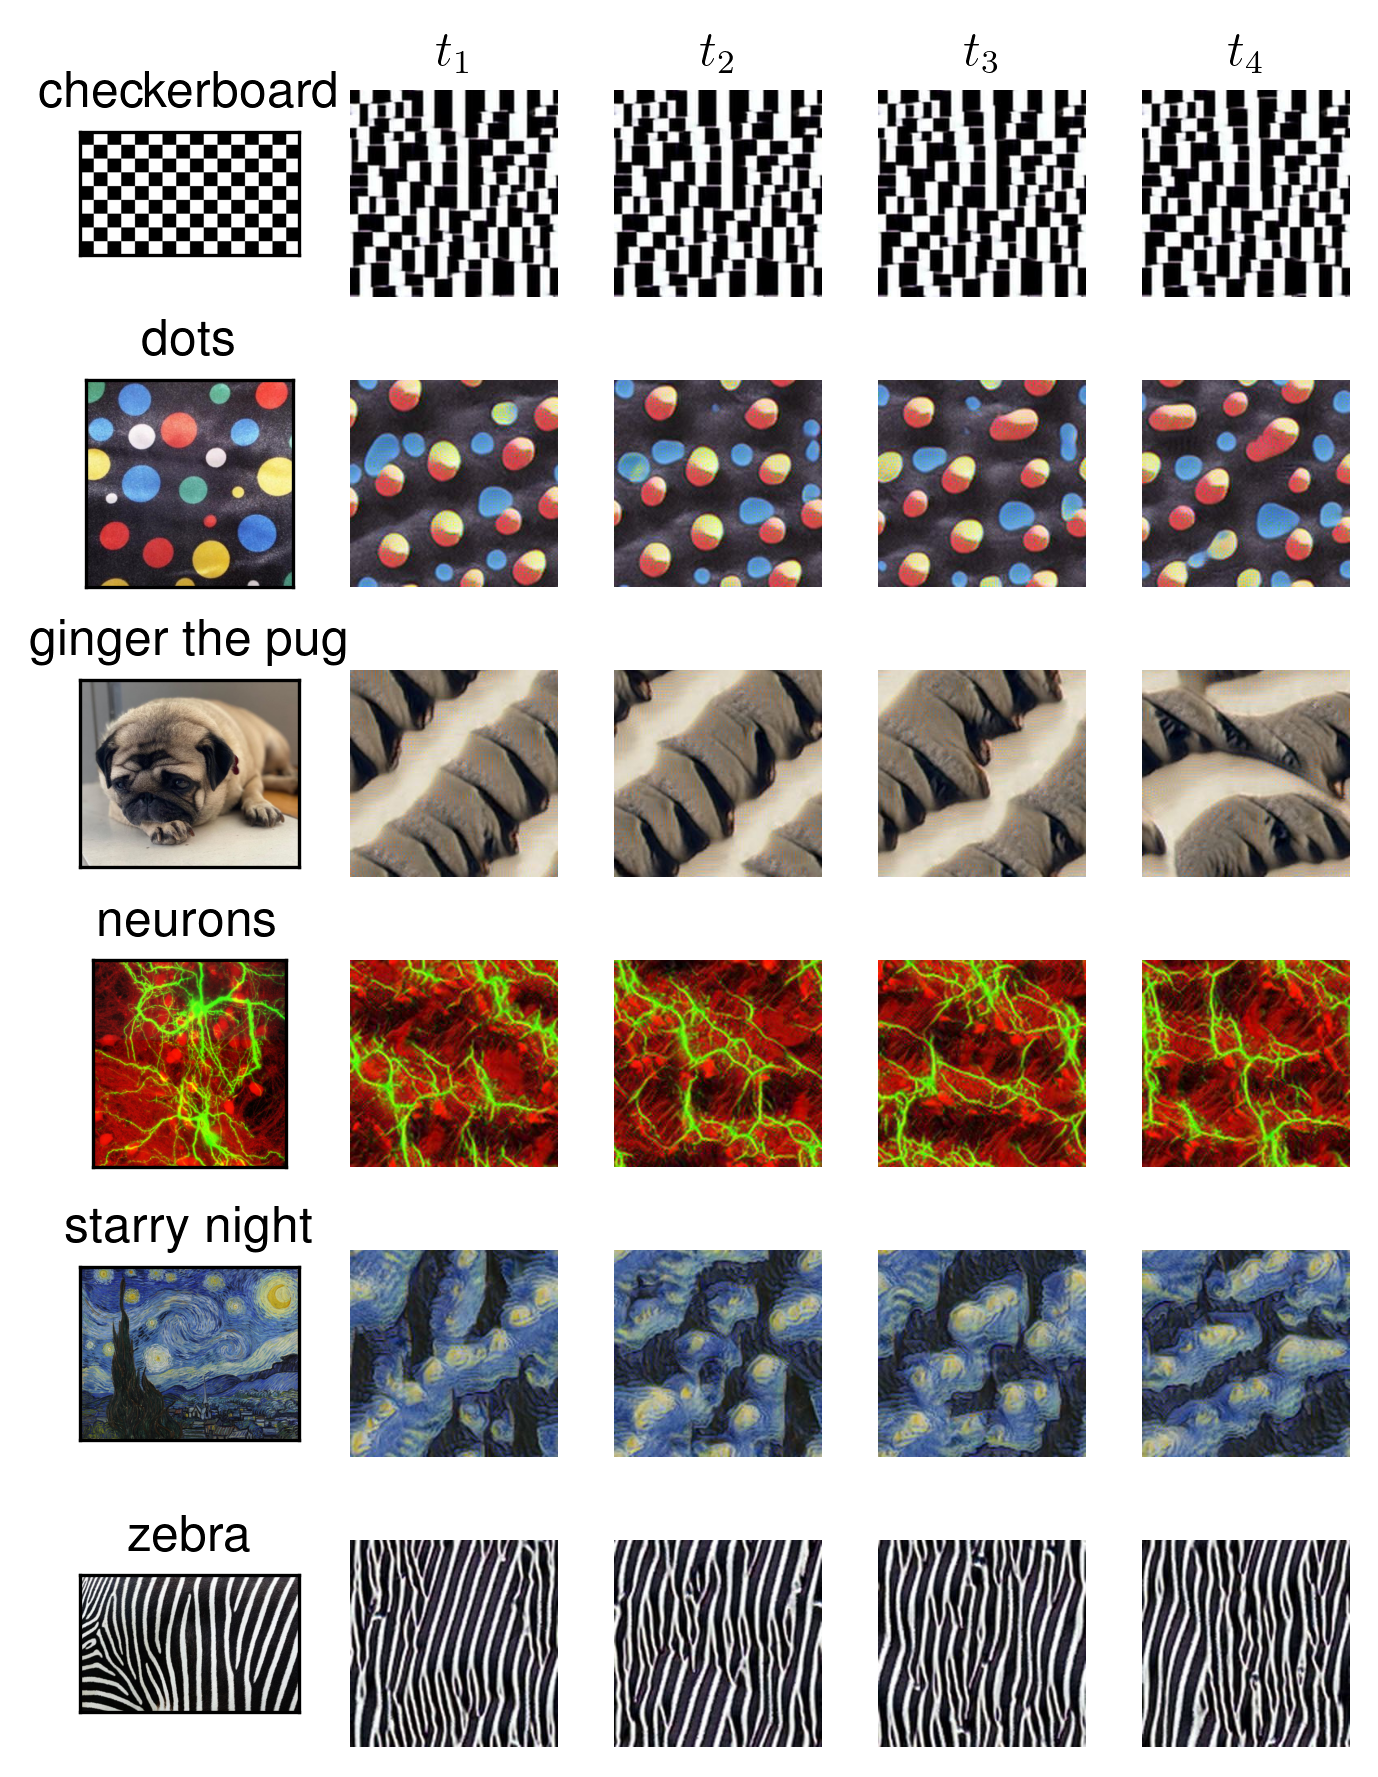

In [74]:
# make subplot of target images and NCA figures
fig, axes = plt.subplots(len(target_names), 5, figsize=(4.55, 6), dpi=300)

for i, target_name in enumerate(target_names):
    axes[i, 0].imshow(target_dict[target_name])
    axes[i, 0].tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False, labelright=False, labelbottom=False)
    axes[i, 0].grid(False)
    axes[i, 0].set_title(figure_labels[i])
    
    # add vertical line separating the first column from the rest
    axes[i, 0].axvline(x=0.5, color='black', linewidth=0.5)
    
    for j in range(4):
        axes[i, j+1].imshow(images_dict[target_name][j])
        axes[i, j+1].axis('off')
        if i ==0:
            axes[i, j+1].set_title(rf'$t_{j+1}$')
            
        
plt.tight_layout()
plt.savefig('../figures/trained_NCAs.pdf', bbox_inches='tight')